In [1]:
import os, glob, json, csv, subprocess, sys, re
from git import *
from subprocess import Popen, PIPE
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as ply
import plotly
from plotly.offline import plot, init_notebook_mode, iplot

%matplotlib inline

In [2]:
userhome = os.path.expanduser('~')
repository = userhome + r'/historage-mining/historage/openjpa/'

# Create directory list

In [3]:
with open ("dir_list.txt", mode="wt", encoding="utf-8") as myfile:
    writers = csv.writer(myfile)
    for dirname, dirpath, filename in os.walk(repository):
        writers.writerow([dirname])

print ("File dir_list.txt has been created")

File dir_list.txt has been created


# Load directory list from file 

In [4]:
dirs = pd.read_csv('dir_list.txt')
print ("Found " + str(len(dirs)) + " dirs")

Found 1068 dirs


# Defining function to extract commit log

In [5]:
def execute_shell_command(cmd, work_dir):
    """Executes a shell command in a subprocess, waiting until it has completed.
 
    :param cmd: Command to execute.
    :param work_dir: Working directory path.
    """
    pipe = subprocess.Popen(cmd, shell=True, cwd=work_dir, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    (out, error) = pipe.communicate()
    return out, error
    pipe.wait()

Defining Repository

In [6]:
repository  = os.path.dirname(userhome + r'/historage-mining/historage/openjpa/') 

List of git command

In [7]:
cmd = ['git log -w --unified=5 | wc -l', 'git log --unified=5 | wc -l', 
       'git log -U0 -w | wc -l', 'git log -U0 | wc -l', 
       'git log -w --patch | wc -l', 'git log --patch | wc -l']

In [8]:
result = []
for i in range(0,len(cmd)):
    sys.stdout.write("\rApplying git command = %i" % (i+1))
    sys.stdout.flush()
    result.append(int(str(execute_shell_command(cmd[i], repository)).replace("b",'').replace("'",'').
                      replace(' ','').replace("\\n,",'').replace("(",'').replace(")",'')))

print ("\n")
x = len(result)
y = x
for item in result:
    print (cmd[x-y] , "\t\t = " , item)
    y = y-1

Applying git command = 6

git log -w --unified=5 | wc -l 		 =  2257496
git log --unified=5 | wc -l 		 =  3083854
git log -U0 -w | wc -l 		 =  1693502
git log -U0 | wc -l 		 =  2519493
git log -w --patch | wc -l 		 =  2075153
git log --patch | wc -l 		 =  2901391


In [9]:
trace = go.Bar(
    x=cmd,
    y=result,
    name='number of line'
)

data = [trace]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# Extracting Commit ID

In [10]:
command = "git log --pretty='%H'"

In [11]:
com_ID = str(execute_shell_command(command, repository)).replace("b'",'').replace("'",'').replace('\\n',' ').replace("(",'').replace(")",'').replace(",",'').split(' ')

# Applying git diff commitID_1 commitID2 --shortstat

In [12]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 4860 out of 4860

1 file changed, 8 insertions(+), 2 deletions(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 22 insertions(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 21 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
2 files changed, 7 insertions(+), 6 deletions(-) ,
2 files changed, 53 insertions(+) ,
2 files changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+), 3 deletions(-) ,
1 file changed, 44 insertions(+), 17 deletions(-) ,
14 files changed, 805 insertions(+), 14 deletions(-) ,
26 files changed, 83 insertions(+), 59 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
6 files changed, 5 insertions(+), 25 deletions(-) ,
1 file changed, 8 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 file

4 files changed, 54 insertions(+), 8 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 197 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 33 insertions(+), 14 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 11 insertions(+), 10 deletions(-) ,
130 files changed, 2 insertions(+), 251 deletions(-) ,
4 files changed, 122 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
3 files changed, 54 insertions(+), 12 deletions(-) ,
(,
2 files changed, 67 insertions(+), 104 deletions(-) ,
7 files changed, 273 insertions(+), 20 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 106 insertions(+), 110 deletions(-) ,
28 files changed, 28 insertions(+), 28 deletions(-) ,
1 file changed, 2 deletions(-) ,
3 files changed, 35 insertions(+), 16 deletions(-) ,
1 file changed, 29 insertio

(,
5 files changed, 205 insertions(+) ,
1 file changed, 7 insertions(+), 5 deletions(-) ,
1 file changed, 11 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
5 files changed, 135 insertions(+), 113 deletions(-) ,
2 files changed, 4 insertions(+), 4 deletions(-) ,
2 files changed, 2 insertions(+), 4 deletions(-) ,
14 files changed, 981 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 21 insertions(+), 13 deletions(-) ,
1 file changed, 4 insertions(+), 6 deletions(-) ,
1 file changed, 18 insertions(+) ,
1 file changed, 1 insertion(+) ,
5 files changed, 421 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 126 insertions(+), 3 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
7 files changed, 376 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
1 file 

3 files changed, 50 insertions(+), 20 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 243 insertions(+), 6 deletions(-) ,
3 files changed, 15 insertions(+), 15 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 86 insertions(+), 25 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 38 insertions(+) ,
1 file changed, 8 insertions(+), 2 deletions(-) ,
2 files changed, 2 deletions(-) ,
3 files changed, 181 insertions(+) ,
13 files changed, 387 insertions(+), 58 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
9 files changed, 217 insertions(+), 15 deletions(-) ,
9 files changed, 156 insertions(+), 36 deletions(-) ,
1 file changed, 8 insertions(+) ,
2 files changed, 34 insertions(+), 10 deletions(-) ,
2 files changed, 15 insertions(+), 12 deletions(-) ,
21 files changed, 3350 insertions(+), 82 deletions(-) ,
6 files changed, 11 insertions(+), 10 deletions(-) ,
1 file changed, 12 inser

2 files changed, 24 insertions(+), 6 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 12 insertions(+), 12 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 19 insertions(+) ,
1 file changed, 27 insertions(+) ,
4 files changed, 115 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
2 files changed, 6 insertions(+), 9 deletions(-) ,
2 files changed, 112 insertions(+), 2 deletions(-) ,
1 file changed, 65 insertions(+), 65 deletions(-) ,
2 files changed, 36 insertions(+) ,
5 files changed, 285 insertions(+), 2 deletions(-) ,
2 files changed, 7 insertions(+), 74 deletions(-) ,
3 files changed, 95 insertions(+), 3 deletions(-) ,
2 files changed, 119 insertions(+) ,
7 files changed, 22 insertions(+), 254 deletions(-) ,
1 file changed, 205 insertions(+), 11 deletions(-) ,
6 files changed, 68 insertions(+), 34 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
2 files changed, 85 insertio

1 file changed, 27 insertions(+), 25 deletions(-) ,
1 file changed, 5 insertions(+), 1 deletion(-) ,
1 file changed, 19 insertions(+) ,
5 files changed, 22 insertions(+), 22 deletions(-) ,
1 file changed, 23 insertions(+) ,
1 file changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 14 insertions(+), 1 deletion(-) ,
3 files changed, 170 insertions(+), 4 deletions(-) ,
9 files changed, 455 insertions(+), 6 deletions(-) ,
1 file changed, 20 insertions(+), 4 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 12 insertions(+), 1 deletion(-) ,
1 file changed, 101 insertions(+) ,
(,
6 files changed, 721 insertions(+), 91 deletions(-) ,
2 files changed, 4 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 4 deletions(-) ,
7 files changed, 374 insertions(+), 3 deletions(-) ,
1 file changed, 4 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file chan

3 files changed, 127 insertions(+), 34 deletions(-) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 9 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 4 insertions(+), 2 deletions(-) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 3 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 2 insertions(+) ,
2 files changed, 3 insertions(+) ,
2 fil

1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 deletions(-) ,
5 files changed, 61 insertions(+), 6 deletions(-) ,
6 files changed, 18 insertions(+), 67 deletions(-) ,
2 files changed, 6 insertions(+), 2 deletions(-) ,
6 files changed, 17 insertions(+), 17 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
2 files changed, 83 insertions(+), 18 deletions(-) ,
1 file changed, 2 insertions(+) ,
3 files changed, 14 insertions(+), 4 deletions(-) ,
1 file changed, 2 insertions(+), 3 deletions(-) ,
5 files changed, 258 insertions(+), 16 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
18 files changed, 1854 insertions(+), 1498 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 7 insertions(+) ,
2 files changed, 19 insertions(+), 89 deletions(-) ,
1 file changed, 1 insertion(+) ,
70 files changed, 1300 insertions(+), 6 deletions(-) ,
1 file changed, 15 insertions(+), 30 

8 files changed, 46 insertions(+), 43 deletions(-) ,
10 files changed, 66 insertions(+), 39 deletions(-) ,
2 files changed, 13 insertions(+) ,
1 file changed, 122 insertions(+), 138 deletions(-) ,
25 files changed, 1479 insertions(+), 279 deletions(-) ,
1 file changed, 7 insertions(+), 1 deletion(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
5 files changed, 131 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 10 insertions(+), 2 deletions(-) ,
1 file changed, 27 insertions(+), 27 deletions(-) ,
5 files changed, 58 insertions(+), 2 deletions(-) ,
1 file changed, 43 insertions(+), 41 deletions(-) ,
1 file changed, 12 insertions(+), 2 deletions(-) ,
1 file changed, 55 insertions(+), 31 deletions(-) ,
2 files changed, 97 insertions(+), 7 deletions(-) ,
7 files changed, 145 insertions(+), 10 deletions(-) ,
7 files changed, 8 insertions(+), 7 deletions(-) ,
11 files changed, 20 insertions(+), 3 deletions(-) ,
25 files changed, 52 in

4 files changed, 294 insertions(+) ,
2 files changed, 11 insertions(+), 3 deletions(-) ,
1 file changed, 13 insertions(+) ,
9 files changed, 434 insertions(+), 64 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 452 insertions(+), 4 deletions(-) ,
3 files changed, 27 deletions(-) ,
3 files changed, 272 insertions(+) ,
4 files changed, 9 insertions(+), 2 deletions(-) ,
3 files changed, 26 insertions(+), 18 deletions(-) ,
1 file changed, 1 deletion(-) ,
8 files changed, 58 insertions(+), 25 deletions(-) ,
12 files changed, 21 insertions(+), 21 deletions(-) ,
1 file changed, 5 insertions(+), 5 deletions(-) ,
8 files changed, 107 insertions(+), 15 deletions(-) ,
4 files changed, 45 insertions(+), 28 deletions(-) ,
1 file changed, 1 deletion(-) ,
15 files changed, 769 insertions(+), 14 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
8 files changed, 955 insertions(+), 15 deletions(-) ,
3 files changed, 69 insertions(+), 4 deletions(-) ,
2 files changed, 3 in

3 files changed, 289 insertions(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 9 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 8 insertions(+) ,
2 files changed, 14 insertions(+), 14 deletions(-) ,
1 file changed, 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 6 insertions(+), 4 deletions(-) ,
1 file changed, 14 insertions(+), 2 deletions(-) ,
2 files changed, 6 insertions(+), 4 deletions(-) ,
2 files changed, 33 insertions(+), 4 deletions(-) ,
1 file changed, 6 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
11 files changed, 246 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 19 insertions(+), 10 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+) ,
1 file changed, 7 insertions(+), 2 delet

In [13]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [14]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [15]:
with open('metrics1.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [16]:
data1 = pd.read_csv('metrics1.csv')
file_sum1 = data1['files changed'].sum()
ins_sum1 = data1['insertions(+)'].sum()
del_sum1 = data1['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum1)
print ("Sum of insertions(+) = %i" % ins_sum1)
print ("Sum of deletions(-)  = %i" % del_sum1)
saved_column1 = data1[header]
saved_column1.head()

Sum of files changed = 31612
Sum of insertions(+) = 1525764
Sum of deletions(-)  = 716378


,files changed,insertions(+),deletions(-)
0,1,8.0,2.0
1,1,6.0,0.0
2,1,22.0,1.0
3,2,3.0,3.0
4,2,21.0,2.0


Text(0,0.5,'Quantity')

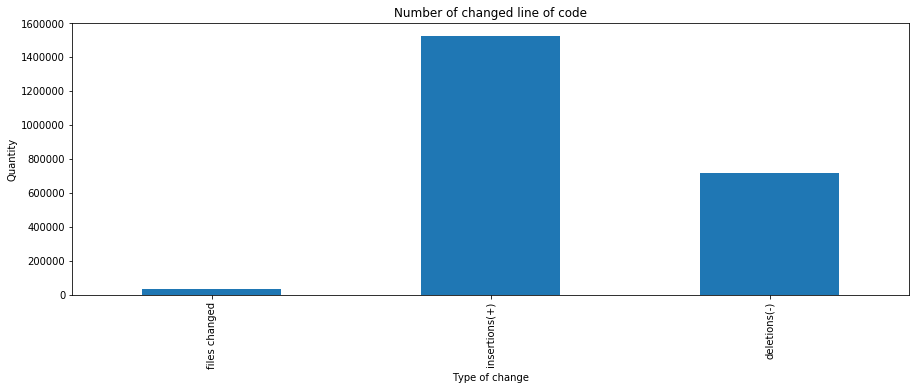

In [17]:
mygraph = data1.sum().plot(figsize=(15,5), kind='bar', title = 'Number of changed line of code')
mygraph.set_xlabel("Type of change")
mygraph.set_ylabel("Quantity")

# Applying git diff -w commitID_1 commitID2 --shortstat

In [18]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 4860 out of 4860

1 file changed, 8 insertions(+), 2 deletions(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 22 insertions(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 21 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
2 files changed, 7 insertions(+), 6 deletions(-) ,
2 files changed, 53 insertions(+) ,
2 files changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+), 3 deletions(-) ,
1 file changed, 31 insertions(+), 4 deletions(-) ,
14 files changed, 798 insertions(+), 7 deletions(-) ,
26 files changed, 83 insertions(+), 59 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
6 files changed, 5 insertions(+), 25 deletions(-) ,
1 file changed, 8 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files 

2 files changed, 5 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
6 files changed, 61 insertions(+), 24 deletions(-) ,
1 file changed, 4 deletions(-) ,
3 files changed, 58 insertions(+), 4 deletions(-) ,
3 files changed, 18 insertions(+), 8 deletions(-) ,
7 files changed, 78 insertions(+), 12 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 228 insertions(+), 14 deletions(-) ,
1 file changed, 58 insertions(+) ,
1 file changed, 8 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 21 insertions(+) ,
2 files changed, 41 insertions(+), 3 deletions(-) ,
4 files changed, 72 insertions(+) ,
4 files changed, 59 insertions(+) ,
4 files changed, 26 insertions(+), 227 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 94 insertions(+), 13 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
1 file c

3 files changed, 18 insertions(+), 15 deletions(-) ,
1 file changed, 8 insertions(+) ,
8 files changed, 789 insertions(+) ,
4 files changed, 97 insertions(+), 104 deletions(-) ,
5 files changed, 467 insertions(+), 84 deletions(-) ,
1 file changed, 27 insertions(+) ,
1 file changed, 14 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
15 files changed, 407 insertions(+), 11 deletions(-) ,
25 files changed, 475 insertions(+), 334 deletions(-) ,
1 file changed, 27 insertions(+) ,
1 file changed, 1 insertion(+) ,
11 files changed, 24 insertions(+), 4 deletions(-) ,
9 files changed, 166 insertions(+), 18 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
5 files changed, 19 insertions(+), 15 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
7 files changed, 186 insertions(+), 12 deletions(-) ,
7 files changed, 518 insertions(+), 15 delet

9 files changed, 162 insertions(+), 2 deletions(-) ,
30 files changed, 999 insertions(+), 46 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 4 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 97 insertions(+), 37 deletions(-) ,
1 file changed, 6 insertions(+), 3 deletions(-) ,
1 file changed, 47 insertions(+), 35 deletions(-) ,
1 file changed, 9 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 4 insertions(+) ,
1 file changed, 1 insertion(+), 8 deletions(-) ,
1 file changed, 15 deletions(-) ,
7 files changed, 80 insertions(+), 60 deletions(-) ,
1 file changed, 7 insertions(+) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
5 files changed, 104 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 5 insertions(+) ,
10 files changed, 410 insertions(+), 1 deletion(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) 

In [19]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [20]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [21]:
with open('metrics2.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [22]:
data2 = pd.read_csv('metrics2.csv')
file_sum2 = data2['files changed'].sum()
ins_sum2 = data2['insertions(+)'].sum()
del_sum2 = data2['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum2)
print ("Sum of insertions(+) = %i" % ins_sum2)
print ("Sum of deletions(-)  = %i" % del_sum2)
saved_column2 = data2[header]
saved_column2.head()

Sum of files changed = 31612
Sum of insertions(+) = 1118523
Sum of deletions(-)  = 309137


,files changed,insertions(+),deletions(-)
0,1,8.0,2.0
1,1,6.0,0.0
2,1,22.0,1.0
3,2,3.0,3.0
4,2,21.0,2.0


Text(0,0.5,'Quantity')

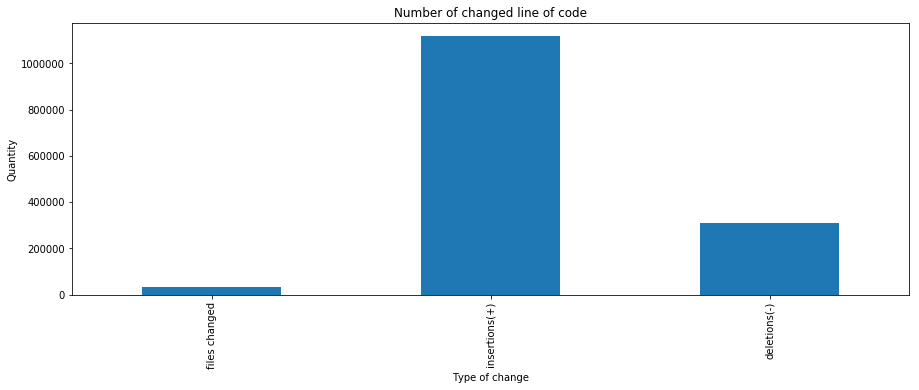

In [23]:
mygraph = data2.sum().plot(figsize=(15,5), kind='bar', title = 'Number of changed line of code')
mygraph.set_xlabel("Type of change")
mygraph.set_ylabel("Quantity")

In [24]:
data = [data1, data2]
table_sum = []
for i in range(0, len(data)):
    summ = 'command %i' % (i+1), data[i]['files changed'].sum(), data[i]['insertions(+)'].sum(), data[i]['deletions(-)'].sum()
    table_sum.append(summ)

for item in table_sum:
    print (item)

('command 1', 31612, 1525764.0, 716378.0)
('command 2', 31612, 1118523.0, 309137.0)


In [25]:
df = pd.DataFrame(table_sum, columns = ['command', 'files changed', 'insertions', 'deletions'])
df.to_csv('metrics_sum.csv')

In [26]:
trace1 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum1, ins_sum1, del_sum1],
    name='git diff commit1 commit2 --shortstat'
)
trace2 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum2, ins_sum2, del_sum2],
    name='git diff -w commit1 commit2 --shortstat'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

# git diff -w --diff-algorithm=myers commit1 commit2 --shortstat

In [27]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=myers " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 4860 out of 4860

1 file changed, 8 insertions(+), 2 deletions(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 22 insertions(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 21 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
2 files changed, 7 insertions(+), 6 deletions(-) ,
2 files changed, 53 insertions(+) ,
2 files changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+), 3 deletions(-) ,
1 file changed, 31 insertions(+), 4 deletions(-) ,
14 files changed, 798 insertions(+), 7 deletions(-) ,
26 files changed, 83 insertions(+), 59 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
6 files changed, 5 insertions(+), 25 deletions(-) ,
1 file changed, 8 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files 

5 files changed, 164 insertions(+), 11 deletions(-) ,
1 file changed, 13 insertions(+), 12 deletions(-) ,
3 files changed, 22 insertions(+), 21 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 101 insertions(+), 2 deletions(-) ,
3 files changed, 3 insertions(+), 3 deletions(-) ,
5 files changed, 354 insertions(+), 2 deletions(-) ,
15 files changed, 466 insertions(+), 1 deletion(-) ,
5 files changed, 298 insertions(+), 2 deletions(-) ,
1 file changed, 8 insertions(+), 1 deletion(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 430 insertions(+), 62 deletions(-) ,
1 file changed, 15 insertions(+), 6 deletions(-) ,
6 files changed, 107 insertions(+), 54 deletions(-) ,
6 files changed, 476 insertions(+), 3 deletions(-) ,
2 files changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
5 files changed, 265 insertions(+)

1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 deletion(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 2 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
2 files changed, 68 insertions(+), 1 deletion(-) ,
3 files changed, 43 insertions(+), 21 deletions(-) ,
4 files changed, 94 insertions(+), 79 deletions(-) ,
2 files changed, 11 insertions(+), 11 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 3 deletions(-) ,
6 files changed, 256 insertions(+) ,
5 files changed, 119 insertions(+), 30 deletions(-) ,
1 file changed, 3 deletions(-) ,
2 files changed, 53 insertions(+), 3 deletions(-) ,
3 files changed, 16 insertions(+), 32 deletions(-) ,
1 file changed, 14 insertions(+) ,
8 files changed, 41 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
5 files changed, 325 insertions(+), 1 deletion(-) ,
1 file chang

3 files changed, 58 insertions(+), 4 deletions(-) ,
3 files changed, 18 insertions(+), 8 deletions(-) ,
7 files changed, 78 insertions(+), 12 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 228 insertions(+), 14 deletions(-) ,
1 file changed, 58 insertions(+) ,
1 file changed, 8 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 21 insertions(+) ,
2 files changed, 41 insertions(+), 3 deletions(-) ,
4 files changed, 72 insertions(+) ,
4 files changed, 59 insertions(+) ,
4 files changed, 26 insertions(+), 227 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 94 insertions(+), 13 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 2 deletions(-) ,
1 file changed, 5 deletions(-) ,
1 file changed, 22 insertions(+), 2 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
4 files changed, 212 insertions(+), 26 deletions(-) ,
2 files changed, 18 ins

1 file changed, 1 insertion(+), 3 deletions(-) ,
10 files changed, 660 insertions(+), 334 deletions(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 5 insertions(+), 10 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 27 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 46 insertions(+), 5 deletions(-) ,
18 files changed, 62 insertions(+), 62 deletions(-) ,
1 file changed, 5 insertions(+), 4 deletions(-) ,
2 files changed, 11 insertions(+), 3 deletions(-) ,
2 files changed, 0 insertions(+), 0 deletions(-) ,
3 files changed, 5 insertions(+), 22 deletions(-) ,
4 files changed, 22 insertions(+), 37 deletions(-) ,
1 file changed, 5 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 7 insertions(+), 2 deletions(-) ,
1 fil

1 file changed, 24 insertions(+), 14 deletions(-) ,
1 file changed, 14 insertions(+), 24 deletions(-) ,
5 files changed, 140 insertions(+), 179 deletions(-) ,
1 file changed, 10 insertions(+) ,
8 files changed, 102 insertions(+), 50 deletions(-) ,
4 files changed, 52 insertions(+), 8 deletions(-) ,
7 files changed, 37 insertions(+), 4 deletions(-) ,
27 files changed, 111 insertions(+), 134 deletions(-) ,
1 file changed, 2 deletions(-) ,
1 file changed, 6 insertions(+), 5 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
3 files changed, 9 insertions(+), 5 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 9 insertions(+) ,
1 file changed, 1 insertion(+) ,
1 file changed, 10 insertions(+), 8 deletions(-) ,
1 file changed, 1 insertion(+), 11 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 175 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 50 insertions(+), 2 deletions(-) ,
2 fi

1 file changed, 147 insertions(+), 135 deletions(-) ,
2 files changed, 13 insertions(+), 4 deletions(-) ,
8 files changed, 386 insertions(+), 9 deletions(-) ,
7 files changed, 550 insertions(+), 199 deletions(-) ,
7 files changed, 237 insertions(+), 3 deletions(-) ,
7 files changed, 320 insertions(+), 4 deletions(-) ,
8 files changed, 41 insertions(+), 7 deletions(-) ,
15 files changed, 279 insertions(+), 348 deletions(-) ,
4 files changed, 109 insertions(+), 5 deletions(-) ,
2 files changed, 26 insertions(+), 3 deletions(-) ,
8 files changed, 1759 insertions(+), 667 deletions(-) ,
9 files changed, 101 insertions(+), 135 deletions(-) ,
5 files changed, 85 insertions(+), 90 deletions(-) ,
17 files changed, 336 insertions(+), 201 deletions(-) ,
8 files changed, 46 insertions(+), 43 deletions(-) ,
10 files changed, 66 insertions(+), 39 deletions(-) ,
2 files changed, 13 insertions(+) ,
1 file changed, 121 insertions(+), 137 deletions(-) ,
25 files changed, 1452 insertions(+), 252 deletion

14 files changed, 194 insertions(+), 262 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 4 insertions(+) ,
3 files changed, 39 insertions(+), 5 deletions(-) ,
8 files changed, 461 insertions(+), 1 deletion(-) ,
1 file changed, 8 insertions(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
3 files changed, 19 insertions(+), 2 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
3 files changed, 17 insertions(+), 18 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
4 files changed, 91 insertions(+), 15 deletions(-) ,
2 files changed, 54 insertions(+), 16 deletions(-) ,
6 files changed, 57 insertions(+), 3 deletions(-) ,
2 files changed, 2 insertions(+), 2 deletions(-) ,
7 files changed, 44 insertions(+), 17 deletions(-) ,
11 files changed, 254 insertions(+), 35 deletions(-) ,
6 files changed, 146 insertions(+), 5 deletions(-) ,
2 files changed, 13 insertions(+) ,
1 file changed, 1 insertion(+) ,
3 files changed, 55 insertio

1 file changed, 5 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 9 insertions(+), 3 deletions(-) ,
11 files changed, 97 insertions(+), 18 deletions(-) ,
1 file changed, 21 insertions(+) ,
1 file changed, 33 insertions(+), 35 deletions(-) ,
1 file changed, 10 insertions(+) ,
1 file changed, 18 insertions(+), 1 deletion(-) ,
2 files changed, 19 insertions(+), 2 deletions(-) ,
1 file changed, 25 insertions(+), 33 deletions(-) ,
3 files changed, 181 insertions(+), 1 deletion(-) ,
13 files changed, 505 insertions(+), 324 deletions(-) ,
4 files changed, 37 insertions(+), 34 deletions(-) ,
1 file changed, 14 insertions(+), 8 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
4 files changed, 145 insertions(+), 31 deletions(-) ,
1 file changed, 14 deletions(-) ,
1 file changed, 7 insertions(+), 7 deletions(-) ,
6 files changed, 137 insertions(+), 35 deletions(-) ,
1 file changed, 

1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 39 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+), 5 deletions(-) ,
1 file changed, 4 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
7 files changed, 156 insertions(+), 4 deletions(-) ,
1 file changed, 15 insertions(+) ,
3 files changed, 157 insertions(+), 80 deletions(-) ,
1 file changed, 6 insertions(+), 2 deletions(-) ,
1 file changed, 9 insertions(+), 1 deletion(-) ,
1 file changed, 35 insertions(+), 3 deletions(-) ,
1 file changed, 3 insertions(+), 2 deletions(-) ,
1 file changed, 3 insertions(+) ,
1 file changed, 24 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 72 insertions(+), 12 deletions(-) ,
2 files changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 15 insertions(+) ,
1 file changed, 44 insertions(+), 4 deletions(-) ,
41 files changed, 31

In [28]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [29]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [30]:
with open('metrics3.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [31]:
data3 = pd.read_csv('metrics3.csv')
file_sum3 = data3['files changed'].sum()
ins_sum3 = data3['insertions(+)'].sum()
del_sum3 = data3['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum3)
print ("Sum of insertions(+) = %i" % ins_sum3)
print ("Sum of deletions(-)  = %i" % del_sum3)
saved_column3 = data3[header]
saved_column3.head()

Sum of files changed = 31612
Sum of insertions(+) = 1118523
Sum of deletions(-)  = 309137


,files changed,insertions(+),deletions(-)
0,1,8.0,2.0
1,1,6.0,0.0
2,1,22.0,1.0
3,2,3.0,3.0
4,2,21.0,2.0


# git diff -w --diff-algorithm=histogram commit1 commit2 --shortstat¶

In [32]:
diff = []
for i in range(0, len(com_ID)-3):
    sys.stdout.write('\rExtracting diff = %i' % (i+1) + ' out of %i' % (len(com_ID)-3))
    sys.stdout.flush()
    diff_cmd = "git diff -w --diff-algorithm=histogram " + com_ID[i+1] + " " + com_ID[i] + " --shortstat"
    diff.append(str(execute_shell_command(diff_cmd, repository)).replace("b'",'').replace("'",'').replace("\\n",' ').replace("( ",'').replace(" )",''))

print ("\n")
for item in diff:   
    print (item)

Extracting diff = 4860 out of 4860

1 file changed, 8 insertions(+), 2 deletions(-) ,
1 file changed, 6 insertions(+) ,
1 file changed, 22 insertions(+), 1 deletion(-) ,
2 files changed, 3 insertions(+), 3 deletions(-) ,
2 files changed, 21 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+), 6 deletions(-) ,
2 files changed, 7 insertions(+), 6 deletions(-) ,
2 files changed, 53 insertions(+) ,
2 files changed, 13 insertions(+), 2 deletions(-) ,
1 file changed, 7 insertions(+), 3 deletions(-) ,
1 file changed, 31 insertions(+), 4 deletions(-) ,
14 files changed, 798 insertions(+), 7 deletions(-) ,
26 files changed, 83 insertions(+), 59 deletions(-) ,
1 file changed, 2 insertions(+), 4 deletions(-) ,
1 file changed, 4 insertions(+) ,
2 files changed, 4 insertions(+), 1 deletion(-) ,
6 files changed, 5 insertions(+), 25 deletions(-) ,
1 file changed, 8 insertions(+), 3 deletions(-) ,
1 file changed, 14 insertions(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files 

5 files changed, 313 insertions(+), 9 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 52 insertions(+), 7 deletions(-) ,
8 files changed, 99 insertions(+), 353 deletions(-) ,
7 files changed, 415 insertions(+), 9 deletions(-) ,
2 files changed, 4 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
3 files changed, 165 insertions(+), 4 deletions(-) ,
1 file changed, 9 insertions(+), 6 deletions(-) ,
1 file changed, 4 insertions(+), 1 deletion(-) ,
8 files changed, 586 insertions(+), 6 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 47 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
5 files changed, 196 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 31 insertions(+), 12 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
2 files changed, 7 insertions(+), 6 

1 file changed, 1 insertion(+) ,
13 files changed, 816 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 618 insertions(+), 339 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 86 insertions(+) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 deletions(-) ,
2 files changed, 25 insertions(+), 3 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 4 insertions(+) ,
1 file changed, 16 insertions(+), 7 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 1 deletion(-) ,
3 files changed, 19 insertions(+), 16 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
2 files changed, 4 insertions(+), 4 deletions(-) ,
11 files changed, 112 insertions(+), 116 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletio

2 files changed, 2 insertions(+), 12 deletions(-) ,
11 files changed, 673 insertions(+), 141 deletions(-) ,
2 files changed, 11 insertions(+), 1 deletion(-) ,
1 file changed, 13 insertions(+), 3 deletions(-) ,
2 files changed, 25 insertions(+), 2 deletions(-) ,
1 file changed, 17 insertions(+), 92 deletions(-) ,
1 file changed, 1 insertion(+) ,
3 files changed, 104 insertions(+) ,
13 files changed, 279 insertions(+), 128 deletions(-) ,
1 file changed, 1 insertion(+) ,
12 files changed, 45 insertions(+), 35 deletions(-) ,
4 files changed, 47 insertions(+), 22 deletions(-) ,
(,
1 file changed, 39 insertions(+), 17 deletions(-) ,
13 files changed, 315 insertions(+), 142 deletions(-) ,
1 file changed, 1 insertion(+) ,
1 file changed, 42 deletions(-) ,
4 files changed, 417 insertions(+) ,
7 files changed, 60 insertions(+), 12 deletions(-) ,
(,
(,
1 file changed, 1 insertion(+), 1 deletion(-) ,
4 files changed, 215 insertions(+), 11 deletions(-) ,
8 files changed, 79 insertions(+), 21 deleti

15 files changed, 0 insertions(+), 0 deletions(-) ,
12 files changed, 0 insertions(+), 0 deletions(-) ,
10 files changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 1 insertion(+) ,
5 files changed, 0 insertions(+), 0 deletions(-) ,
9 files changed, 143 insertions(+), 65 deletions(-) ,
2 files changed, 36 insertions(+) ,
2 files changed, 12 insertions(+) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
10 files changed, 398 insertions(+), 109 deletions(-) ,
1 file changed, 1 deletion(-) ,
10 files changed, 91 insertions(+), 37 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
15 files changed, 0 insertions(+), 0 deletions(-) ,
5 files changed, 396 insertions(+), 5 deletions(-) ,
1 file changed, 40 insertions(+), 1 deletion(-) ,
1 file changed, 4 insertions(+) ,
4 files changed, 119 insertions(+), 16 deletions(-) ,
9 files changed, 447 insertions(+), 92 deletions(-) ,
3 files changed, 4 insertions(+), 4 deletions(-) ,
1 file changed, 1 deletion(-) ,
2 files change

3 files changed, 36 insertions(+), 18 deletions(-) ,
1 file changed, 2 insertions(+), 3 deletions(-) ,
1 file changed, 10 insertions(+), 5 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
18 files changed, 1152 insertions(+), 7 deletions(-) ,
4 files changed, 204 insertions(+), 46 deletions(-) ,
4 files changed, 36 insertions(+), 28 deletions(-) ,
10 files changed, 26 insertions(+), 10 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
4 files changed, 14 insertions(+), 15 deletions(-) ,
8 files changed, 67 deletions(-) ,
1 file changed, 11 insertions(+) ,
1 file changed, 3 insertions(+), 5 deletions(-) ,
10 files changed, 222 insertions(+), 96 deletions(-) ,
1 file changed, 3 insertions(+) ,
29 files changed, 1121 insertions(+), 249 deletions(-) ,
5 files changed, 60 insertions(+), 41 deletions(-) ,
6 files changed, 368 insertions(+) ,
3 files changed, 55 insertions(+), 38 deletions(-) ,
1 file changed, 16 insertions(+), 11 deletions(-) ,
1 file changed, 1

1 file changed, 1 insertion(+) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file changed, 1 insertion(+), 1 deletion(-) ,
1 file changed, 96 insertions(+) ,
6 files changed, 250 insertions(+), 2 deletions(-) ,
1 file changed, 5 insertions(+), 4 deletions(-) ,
5 files changed, 5 insertions(+), 685 deletions(-) ,
1 file changed, 21 insertions(+), 1 deletion(-) ,
34 files changed, 3455 insertions(+) ,
2 files changed, 6 insertions(+), 15 deletions(-) ,
1 file changed, 0 insertions(+), 0 deletions(-) ,
1 file changed, 133 deletions(-) ,
1 file changed, 2 insertions(+), 1 deletion(-) ,
1 file changed, 1 deletion(-) ,
8 files changed, 170 insertions(+), 28 deletions(-) ,
1 file changed, 3 insertions(+), 1 deletion(-) ,
1 file changed, 3 insertions(+), 3 deletions(-) ,
3 files changed, 33 insertions(+), 7 deletions(-) ,
2 files changed, 20 insertions(+), 2 deletions(-) ,
3 files changed, 34 insertions(+), 6 deletions(-) ,
1 file changed, 2 insertions(+), 2 deletions(-) ,
1 file chang

In [33]:
for x in range(0,len(diff)):
    line = diff[x]
    if "deletion" not in diff[x]:
        index = line.find('(+)')
        diff[x] = line[:index] + ', 0 deletions(-) ,'
    if "insertion" not in diff[x]:
        index = diff[x].find(',')
        diff[x] = line[:index] + ', 0 insertions(+)' + line[index:]
    else:
        diff[x] = diff[x]

In [34]:
diff_metrics = []
for j in range(0,len(diff)):
    diff_metrics.append(re.findall(r'\d+', diff[j]))

for k in range(0, len(diff_metrics)):
    diff_metrics[k] = list(map(int, diff_metrics[k]))

In [35]:
with open('metrics4.csv', 'w') as csvfile:
    header = ['files changed', 'insertions(+)', 'deletions(-)']
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)
    for row in diff_metrics:
        writer.writerow(row)

In [36]:
data4 = pd.read_csv('metrics4.csv')
file_sum4 = data4['files changed'].sum()
ins_sum4 = data4['insertions(+)'].sum()
del_sum4 = data4['deletions(-)'].sum()
print ("Sum of files changed = %i" % file_sum4)
print ("Sum of insertions(+) = %i" % ins_sum4)
print ("Sum of deletions(-)  = %i" % del_sum4)
saved_column4 = data4[header]
saved_column4.head()

Sum of files changed = 31612
Sum of insertions(+) = 1120387
Sum of deletions(-)  = 311001


,files changed,insertions(+),deletions(-)
0,1,8.0,2.0
1,1,6.0,0.0
2,1,22.0,1.0
3,2,3.0,3.0
4,2,21.0,2.0


In [37]:
trace1 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum1, ins_sum1, del_sum1],
    name='git diff'
)
trace2 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum2, ins_sum2, del_sum2],
    name='git diff -w'
)
trace3 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum3, ins_sum3, del_sum3],
    name='git diff -w --diff-algorithm=myers'
)
trace4 = go.Bar(
    x=['files changed', 'insertions', 'deletions'],
    y=[file_sum4, ins_sum4, del_sum4],
    name='git diff -w --diff-algorithm=histogram'
)

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    barmode='group'
)

init_notebook_mode(connected=True)
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)